# **[LS22] UC Berkeley Admission Rate**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<br/>

<hr style="border: 1px solid #fdb515;" />

# INSTRUCTOR ONLY: SPLIT 2 (9.1, 10.1, 11.2)

INSTRUCTOR ONLY: General breakdown of activities
1. Short discussions questions
2. Reload dataset
3. Create pivot tables leading to simpson’s paradox
4. Lots of graphing
5. Maybe predictive modeling at the end for funsies


## Part 2: Exploratory Data Analysis (EDA) and Observations


## Takeaway
In this lab, we aim to prepare students for utilizing data science and decision making skillsets with the UC Berkeley 1973 Graduate Admission
Rate dataset. The objectives of this lab are as follows:


- **Heuristics**:
  - Understand and apply heuristics in decision-making, while identifying and avoiding biases like Base Rate Neglect, Representativeness Heuristic, Conjunction Fallacy, and Availability Heuristic.
  - Learn the fundamentals of Bayesian reasoning to enhance judgment and decision-making skills.

- **Confirmation Bias**:
  - Be aware of the tendency to favor existing beliefs, even against evidence.
  - Learn about selective exposure and biased assimilation, and how to mitigate confirmation bias by seeking counter-evidence.

- **When is Science Suspect**:
  - Recognize the potential to use science for social and political ends.
  - Be cautious of science that studies human groups and subsequent validation of societal power structures.
  - Recognize one's own involvement in the social dynamic to the assessment of any study of human groups.

A university's admission is related to the different aspects of the society, and often becomes a good reflection on societal's values and dynamic. For this part of the assignment, we will be working with a segment of **UC Berkeley's 1973 graduate admission data** to further explore how gender (recorded binary: Female and Male during 1973) plays a role in admission.

In *Part 1: Observation and Instrumentation*, we explored the data from a less objective lens by making obsersvations, claims, and credence levels to what we thought the dataset represented simply by taking glances at the raw data. In this part, we will get the chance to really dive into the data by perfomring Exploratory Data Analysis.

EDA is the process of analyzing/summarizing data to extract valuable insights and patterns that can help guide further analysis.

EDA is usually performed at the beginning of a data science project and helps to guide the direction of the analysis. EDA allows us to gain an understanding of the data, identify any patterns or anomalies, and detect any potential issues that may affect the analysis.

In the following problems, we will perform EDA on our admission rates dataset.

**Question 1.1**: Like last lab, load the *```berkeley.csv```* dataset below.

In [5]:
# ONLY RUN IF ON GOOGLE COLAB
# Sync Google Drive to get CSV file
## from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# Load UC Berkeley 1973 Graduate Admission Rate Dataset
berkeley = ...
berkeley.head(15)

AttributeError: 'ellipsis' object has no attribute 'head'

In [10]:
# Instructor_only / Solution

berkeley = pd.read_csv('berkeley.csv')
berkeley.head(15)

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
5,1973,Other,M,Rejected
6,1973,F,F,Accepted
7,1973,Other,M,Accepted
8,1973,Other,M,Rejected
9,1973,A,M,Accepted


As we saw in *Part 1*, only using our senses can be very limiting in our ability to accurately describe the story that our dataset is trying to tell. Thus, let's utilize instruments such as `pandas`, `numpy`, and `matplotlib` to paint a better picture!

In [ ]:
# Data Collection and Trustworthiness:
# Explore the origins of the data (e.g., Berkeley dataset), its collection process, and its validity.
# Discuss factors that could affect data collection and responses.
# Consider watching an associated video to deepen understanding.


**Question 2.1)** Using *`berkeley.csv`*, calculate the admission rates of Female vs. Male applicants. <br>
*Hint: Conditional expressions may be useful here*

In [ ]:
...

admission_rate_f = ...
admission_rate_m = ...

print(f"Admission rate for female applicants: {admission_rate_f}\nAdmission rate for male applicants: {admission_rate_m}")

Admission rate for female applicants: Ellipsis
Admission rate for male applicants: Ellipsis


In [11]:
# Instructor_only / Solution

# Calculate the total number of females and males
total_f = (berkeley["Gender"] == "F").sum()
total_m = (berkeley["Gender"] == "M").sum()

# Calculate the number of accepted females and males
accepted_f = berkeley[(berkeley["Admission"] == "Accepted") & (berkeley["Gender"] == "F")].shape[0]
accepted_m = berkeley[(berkeley["Admission"] == "Accepted") & (berkeley["Gender"] == "M")].shape[0]

# Calculate the acceptance rates for females and males
admission_rate_f = (accepted_f / total_f)
admission_rate_m = (accepted_m / total_m)

# Print the results
print(f"Admission rate for female applicants: {admission_rate_f}\nAdmission rate for male applicants: {admission_rate_m}")

Admission rate for female applicants: 0.3457532978477204
Admission rate for male applicants: 0.4427860696517413


**Question 2.2)** Using the `berkeley` dataframe, create a pivot table that ...

In [12]:
# Create a pivot table to get the totals for Accepted and Rejected admissions per Gender
admission_f_m = berkeley
admission_f_m = pd.pivot_table(admission_f_m, index = "Gender", columns = "Admission", aggfunc="size")
admission_f_m = admission_f_m.reset_index()
admission_f_m["Gender"] = ["Female", "Male"]
admission_f_m["Admission Rate"] = [admission_rate_f, admission_rate_m]
admission_f_m

Admission,Gender,Accepted,Rejected,Admission Rate
0,Female,1494,2827,0.345753
1,Male,3738,4704,0.442786


**Question 2.3)** Using the pivot table you just constructed, create a `bar` plot comparing the number of accepted students by gender.

<BarContainer object of 2 artists>

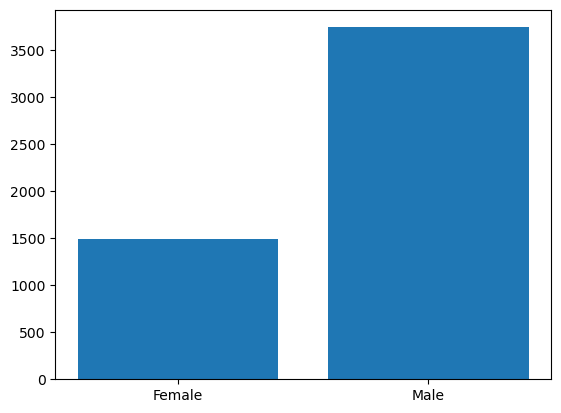

In [13]:
# SOLUTION
plt.bar(x=admission_f_m['Gender'], height=admission_f_m['Accepted'])

**Question  2.4)** Using the same pivot table, create a `barh` plot comparing the acceptance rates between each gender.

Text(0, 0.5, 'Gender')

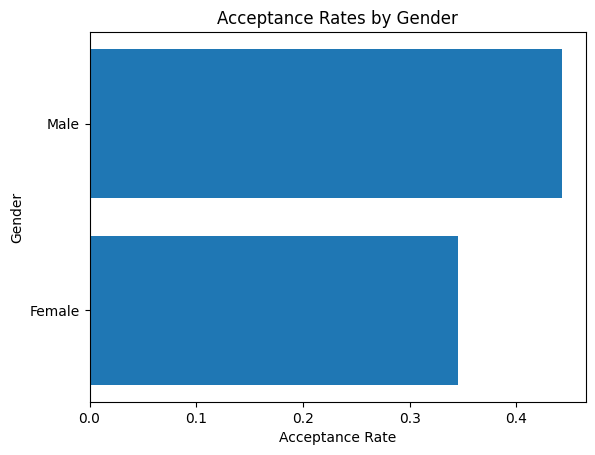

In [ ]:
plt.barh(admission_f_m["Gender"], admission_f_m["Acceptance Rate"])
plt.title("Acceptance Rates by Gender")
plt.xlabel("Acceptance Rate")
plt.ylabel("Gender")

**Question #**: Using the `berkeley` dataframe, create a dictionary of the following form:

{"M" : # of male applicants accepted, "F" : # of female applicants accepted}

In [ ]:
# SOLUTION
berkeley_accepted = berkeley[berkeley["Admission"] == "Accepted"]
m_accepted = berkeley_accepted[berkeley_accepted["Gender"] == "M"].shape[0]
f_accepted = berkeley_accepted[berkeley_accepted["Gender"] == "F"].shape[0]

dict_accepted = {"M" : m_accepted, "F" : f_accepted}
dict_accepted

{'M': 3738, 'F': 1494}

**Question #**:

In [23]:
file_path = 'berkeley.csv'
berkeley_data = pd.read_csv(file_path)
berkeley_data.head()

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected


In [24]:
berkeley_data['Admission_Status'] = berkeley_data['Admission'].apply(lambda x: 1 if x == 'Accepted' else 0)
overall_admission_rates = berkeley_data.groupby('Gender')['Admission_Status'].agg(['mean', 'count']).reset_index()
overall_admission_rates.columns = ['Gender', 'Admission_Rate', 'Total_Applicants']

overall_admission_rates.head()

,Gender,Admission_Rate,Total_Applicants
0,F,0.345753,4321
1,M,0.442786,8442


In [25]:
# Admission rates by gender within each major
major_admission_rates = berkeley_data.groupby(['Major', 'Gender'])['Admission_Status'].agg(['mean', 'count']).reset_index()
major_admission_rates.columns = ['Major', 'Gender', 'Admission_Rate', 'Total_Applicants']
major_admission_rates

,Major,Gender,Admission_Rate,Total_Applicants
0,A,F,0.824074,108
1,A,M,0.724956,1138
2,B,F,0.680000,25
3,B,M,0.630357,560
4,C,F,0.338954,593
5,C,M,0.369231,325
6,D,F,0.349333,375
7,D,M,0.330935,417
8,E,F,0.239186,393
9,E,M,0.277487,191


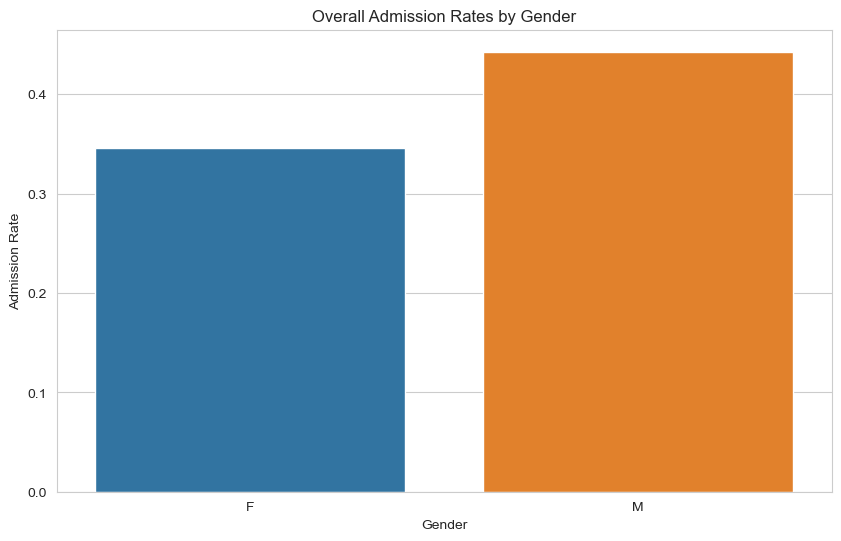

In [27]:
import seaborn as sns
sns.set_style("whitegrid")

# Plot for overall admission rates by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Admission_Rate', data=overall_admission_rates)
plt.title('Overall Admission Rates by Gender')
plt.ylabel('Admission Rate')
plt.xlabel('Gender')
plt.show()

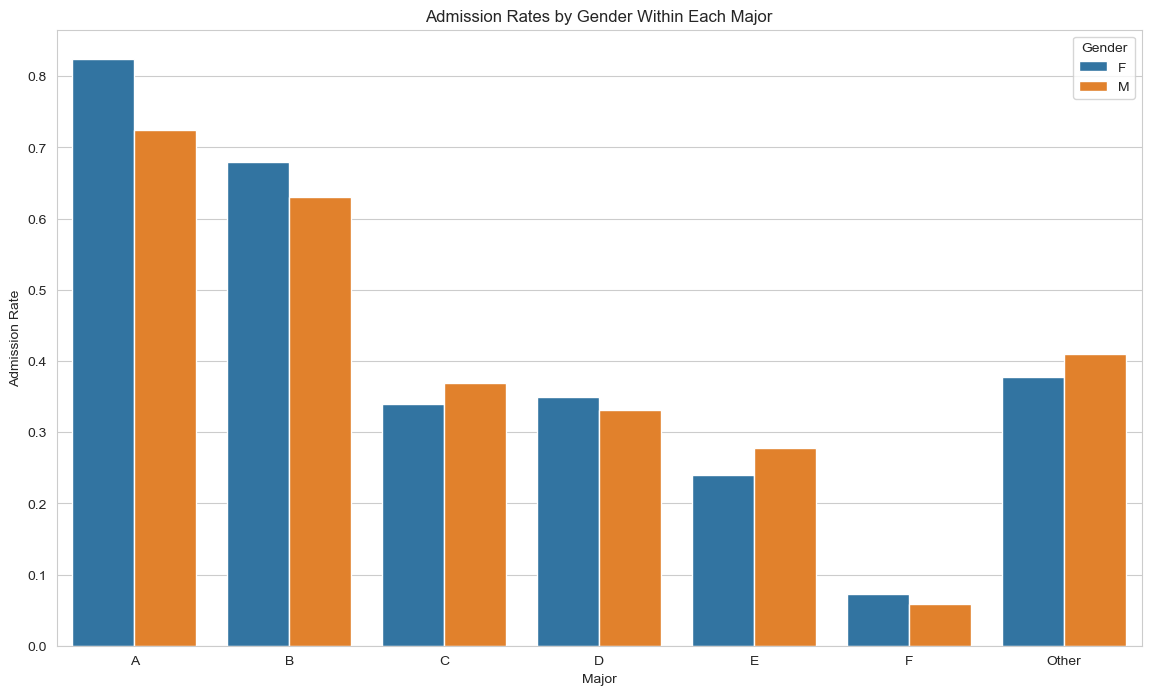

In [28]:
# Plot for admission rates by gender within each major
plt.figure(figsize=(14, 8))
sns.barplot(x='Major', y='Admission_Rate', hue='Gender', data=major_admission_rates)
plt.title('Admission Rates by Gender Within Each Major')
plt.ylabel('Admission Rate')
plt.xlabel('Major')
plt.legend(title='Gender')
plt.show()
